# Alireza Soroudi 
# alireza.soroudi@gmail.com 

In [16]:
from pyomo.environ import *
import numpy as np 
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [25]:
model = AbstractModel()
model.i = RangeSet(15)
model.f = RangeSet(5)
model.d = RangeSet(7)

model.U = Var(model.i, model.f, model.d, initialize = 0,within=Binary)
model.z = Var(model.i, model.i, model.f, model.d, bounds=(0,1), initialize = 0,within=Reals)

def rule_c1(model,i):
    return sum(model.U[i,f,d] for f in model.f for d in model.d) == 7
model.C1 = Constraint(model.i, rule = rule_c1)

def rule_c2(model,f,d):
    return sum(model.U[i,f,d] for i in model.i) == 3
model.C2 = Constraint(model.f,model.d, rule = rule_c2)

def rule_c3(model,i,d):
    return sum(model.U[i,f,d] for f in model.f) == 1
model.C3 = Constraint(model.i,model.d, rule = rule_c3)


def rule_c4(model,i,j):
    if i >j:
        return sum(model.z[i,j,f,d]  for f in model.f for d in model.d) <= 1
    else:
        return Constraint.Skip 
model.C4 = Constraint(model.i,model.i, rule = rule_c4)

def rule_c5A(model,i,j,f,d):
    if i >j:
        return model.z[i,j,f,d] >=  model.U[i,f,d] + model.U[j,f,d] -1 
    else:
        return Constraint.Skip 
model.C5A = Constraint(model.i,model.i,model.f,model.d, rule = rule_c5A)

def rule_c5B(model,i,j,f,d):
    if i >j:
        return model.z[i,j,f,d] <=  model.U[i,f,d] 
    else:
        return Constraint.Skip 
model.C5B = Constraint(model.i,model.i,model.f,model.d, rule = rule_c5B)

def rule_c5C(model,i,j,f,d):
    if i >j:
        return model.z[i,j,f,d] <=  model.U[j,f,d] 
    else:
        return Constraint.Skip 
model.C5C = Constraint(model.i,model.i,model.f,model.d, rule = rule_c5C)

def rule_of(model):
    return 0
model.obj = Objective(rule = rule_of, sense=maximize)

opt = SolverFactory('cbc')
instance = model.create_instance()


results = opt.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

print('OF = ', round(value(instance.obj),4) )

    solver failure.
feasible
OF =  0.0


In [26]:
for d in instance.d:
    a= [ [i for i in instance.i if value(instance.U[i,f,d])>0] for f in instance.f ]
    print(d, a )

1 [[12, 13, 15], [2, 3, 5], [1, 10, 14], [7, 8, 11], [4, 6, 9]]
2 [[4, 11, 14], [1, 9, 12], [5, 6, 7], [3, 8, 13], [2, 10, 15]]
3 [[6, 11, 13], [1, 2, 8], [5, 14, 15], [7, 9, 10], [3, 4, 12]]
4 [[9, 13, 14], [6, 8, 15], [1, 4, 5], [3, 10, 11], [2, 7, 12]]
5 [[1, 11, 15], [6, 10, 12], [2, 4, 13], [3, 7, 14], [5, 8, 9]]
6 [[8, 12, 14], [1, 3, 6], [2, 9, 11], [5, 10, 13], [4, 7, 15]]
7 [[1, 7, 13], [5, 11, 12], [2, 6, 14], [3, 9, 15], [4, 8, 10]]


In [65]:
colors = [
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'xkcd:azure',
    'xkcd:chartreuse',
    'xkcd:crimson',
    'xkcd:indigo',
    'xkcd:lavender',
    'xkcd:gold',
    'xkcd:teal',
    'xkcd:magenta'
]


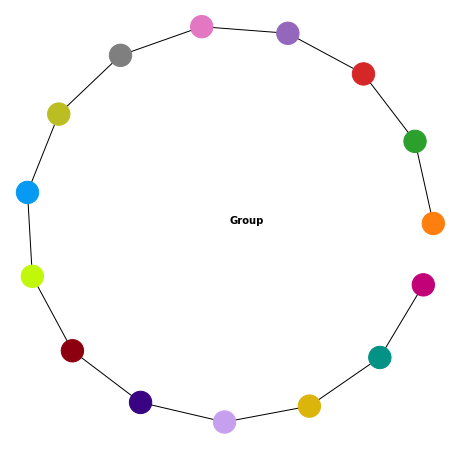

In [72]:
plt.figure(figsize=(8,8))
R = 8 
r = 20 
KOLOR = []
plt.text(x0,y0, s= str('Group'), fontweight='bold')
Nprof, Nprof = 15, 15
studentx = [x0+ R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
studenty = [y0+ R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]

plt.plot(studentx,studenty, lw = 1, c = 'k')
plt.scatter(studentx,studenty, s = 500, c = colors, zorder=400)



plt.axis('off')
plt.savefig('golfers_base'+  '.jpg', format='jpg', dpi=400)

plt.show()

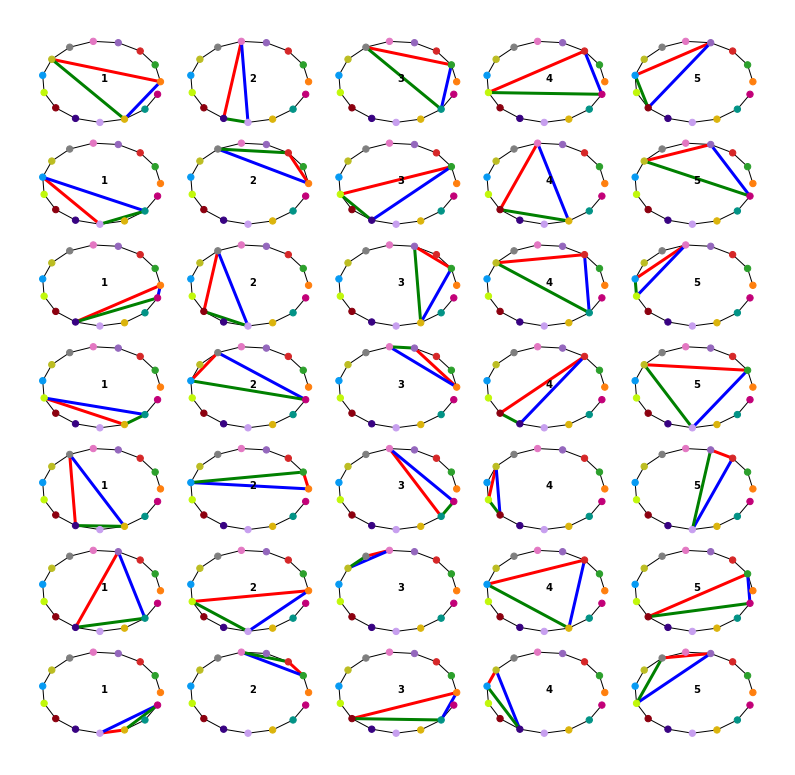

In [75]:
plt.figure(figsize=(14,14))
R = 8 
r = 20 
KOLOR = []
for d in instance.d:
    for f in instance.f:
        x0,y0 = 20+f*20, 20 + 20*d
        plt.text(x0,y0, s= str(f), fontweight='bold')
        Nprof, Nprof = 15, 15
        studentx = [x0+ R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
        studenty = [y0+ R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]

        plt.plot(studentx,studenty, lw = 1, c = 'k')
        plt.scatter(studentx,studenty, s = 40, c = colors, zorder=400)
        a= [ [i for i in instance.i if value(instance.U[i,f,d])>0]]
        for [i1,i2,i3] in a:
            x1,y1= studentx[i1-1] ,studenty[i1-1] 
            x2,y2= studentx[i2-1] ,studenty[i2-1] 
            x3,y3= studentx[i3-1] ,studenty[i3-1] 
            plt.plot([x1,x2],[y1,y2], lw = 3, c = 'r')
            plt.plot([x1,x3],[y1,y3], lw = 3, c = 'b')
            plt.plot([x2,x3],[y2,y3], lw = 3, c = 'g')



plt.axis('off')
plt.savefig('golfers'+  '.jpg', format='jpg', dpi=400)
plt.savefig('golfers'+  '.png', format='png', dpi=300)

plt.show()